[View in Colaboratory](https://colab.research.google.com/github/JozeeLin/google-tensorflow-exercise/blob/master/%E6%B7%B1%E5%BA%A6%E5%BC%BA%E5%8C%96%E5%AD%A6%E4%B9%A0.ipynb)

强化学习(Reinforcement Learning)是机器学习的一个重要分支，主要用来解决连续决策的问题。强化学习可以在复杂的、不确定的环境中学习如何实现我们设定的目标。

强化学习的应用场景非常广，几乎包括了所有需要做一系列决策的问题，比如控制机器人的电机让它执行特定任务，给商品定价或者库存管理、玩视频游戏或棋牌游戏等。

强化学习也可以应用到有序列输出的问题中，因为它可以针对一系列变化的环境状态，输出一系列对应的行动。

一个强化学习问题包含三个主要概念，即环境状态(Environment State)、行动(Action)和奖励(Reward),而强化学习的目标就是获得最多的累积奖励。

google DeepMind结合强化学习与深度学习，提出DQN，它可以自动玩Atari2600系列的游戏，并取得了超过人类的水平。

而deepmind的alphaGo结合了策略网络(Policy Network)、估值网络(value network,即DQN)与蒙特卡洛搜索树(Monte Carlo Tree Search),实现了具有超高水平的围棋对战程序。

**无人驾驶**是一个非常复杂、非常困难的强化学习任务，在深度学习出现之前，几乎不可能实现。无人驾驶汽车通过各种传感器获取**环境信息**，然后通过深度学习模型中的CNN,RNN等环境信息进行处理、抽象和转化，再结合强化学习算法框架预测出最应该执行的动作，来实现自动驾驶。无人驾驶汽车每次执行的动作，都会让它到目的地的路程更短，这就是每次行动的**奖励**。

深度强化学习的另一个重要应用是操控复杂的机械装置。一般情况下，我们需要给机械装置编写逻辑非常复杂的控制代码来让他们执行具体的操作。

深度强化学习模型中前几层可使用卷积网络，然后可以使用卷积网络对摄像头捕获的图像进行处理和分析，让模型能“看见”环境并识别出物体位置，再通过强化学习框架，

学习如何通过一系列动作来最高效的拾取物体。因此，我们可以通过深度强化学习来让模型学会自动驾驶直升飞机。

同时，我们也可以使用深度强化学习自动玩游戏，用DQN可学习自动玩Flappy Bird.DQN前几层通常也是卷积层，因此具有了对游戏图像像素直接进行学习的能力。**前几层卷积可理解和识别游戏图像中的物体，后层的神经网络则对Action的期望价值进行学习，结合这两个部分，可以得到能根据游戏像素自动玩Flappy Bird的强化学习策略**。

在AlphaGo中使用了快速走子(Fast Rollout)、策略网络、估值网络和蒙特卡洛搜索树等技术。

Policy-Based(Policy Gradients)和Value-Based(或者Q-Learning)是强化学习中最重要的两类方法，其主要区别在于Policy-Based的方法直接预测在某个环境状态下应该采取的Action，而Value Based的方法则预测某个环境状态下所有Action的期望价值(Q值)，之后可以通过选择Q值最高的Action执行策略。

## 策略网络
所谓策略网络，即建立一个神经网络模型，它可以通过观察环境状态，直接预测出目前最应该执行的策略Policy，执行这个策略可以获得最大的期望收益。

Policy Based的方法相比于Value-Based，有更好的收敛性(通常可以保证收敛到局部最优，且不会发散)，同时对高维或者连续值得Action非常高效(训练和输出结果都更高效)。同时能学习出带有随机性的策略。

使用Gym辅助进行策略网络的训练。Gym是OpenAI推出的开源的强化学习的环境生成工具。它的主要作用是为研究者和开发者提供一个方便的强化学习任务环境，例如文字游戏、棋类游戏、视频图像游戏等，并且让用户可以和其他人的强化学习算法进行效率、性能上的比较。

## 强化学习研究的限制
强化研究之前主要受制于两个因素：
- 缺乏高质量的BenchMark，对于图像识别、监督学习等问题
- 我们没有一个通用的环境标准、强化学习的相关论文很难进行横向比较，不同任务使用的环境定义、reward函数、可用的Action都会有区别，而且不同任务的难度可能差异非常大。

Gym则非常好的解决了这两个问题，提供了大量的标准化的环境，可以用来公平的横向对比强化学习模型的性能。Gym的用户可以上传模型效果和训练日志到OpenAI Gym Service的接口，

随后可以参与某个任务的排名，和其他研究者比较模型的效果，并分享算法的思路给其他研究者。

## Gym
**在Gym中，有两个核心的概念，一个是Environment，致我们的任务或者问题，另一个就是Agent，即我们编写的策略或算法。**Agent会将执行的Action传给Environment，

Environment接收某个Action后，再将结果Observation(即环境状态)和Reward返回给Agent。Gym中提供了完整的Environment的接口，而Agent则是完全由用户编写。

目前，Gym一共包含了几个大类的环境，分别是Algorithmic(算法)、Atari游戏(使用了Arcade Learning Environment)、

Board Games(棋牌类游戏，其中围棋包含了9x9和19x19两种规模，目前使用的对抗程序为pachi)、Box2D(二维的物理引擎)、Classic Control(经典的控制类问题)、

MuJoCo(另一个高效的物理引擎，可以实现非常细节的物理模拟，包括碰撞，可以用来控制2D或者3D的机器人执行一些任务操作)，以及Toy Text(文本类型)的任务。

## 本例说明
下面使用TensorFlow创建一个基于策略网络的Agent来解决CartPole问题。本节代码主要来自DeepRL-Agent的开源实现

In [2]:
!pip install gym

    100% |████████████████████████████████| 1.5MB 5.6MB/s 
    100% |████████████████████████████████| 1.0MB 11.4MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/cb/14/71/f4ab006b1e6ff75c2b54985c2f98d0644fffe9c1dddc670925
Successfully built gym


In [3]:
!apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libelf1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglu1-mesa libllvm5.0 libpciaccess0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxi6 libxshmfence1 libxxf86vm1
Suggested packages:
  pciutils lm-sensors python-numpy libgle3
The following NEW packages will be installed:
  freeglut3 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libelf1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglu1-mesa libllvm5.0 libpciaccess0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxi6 libxshmfence1 libxxf86vm1
  python-opengl
0 upgr

Selecting previously unselected package libxcb-glx0:amd64.
Preparing to unpack .../09-libxcb-glx0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-glx0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-present0:amd64.
Preparing to unpack .../10-libxcb-present0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-present0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-sync1:amd64.
Preparing to unpack .../11-libxcb-sync1_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-sync1:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxdamage1:amd64.
Preparing to unpack .../12-libxdamage1_1%3a1.1.4-3_amd64.deb ...
Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libxfixes3:amd64.
Preparing to unpack .../13-libxfixes3_1%3a5.0.3-1_amd64.deb ...
Unpacking libxfixes3:amd64 (1:5.0.3-1) ...
Selecting previously unselected package libdrm-amdgpu1:amd64.
Preparing to unpack .../14-libdrm-amdgpu1_2.4.83-1_amd64.deb ...
Unp

Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


In [29]:
import numpy as np
import tensorflow as tf
import gym
env = gym.make('CartPole-v0') #创建CartPole问题的环境env

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [0]:
import random
import itertools
import scipy.misc
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
#测试在CartPole环境中使用随机Action的表现，作为接下来对比的baseline。

env.reset()
random_episodes = 0
reward_sum = 0
while random_episodes < 10:
  #env.render()
  observation,reward, done, _ = env.step(np.random.randint(0,2))
  reward_sum += reward
  if done:
    random_episodes += 1
    print('Reward for this episode was:', reward_sum)
    reward_sum = 0
    env.reset()

Reward for this episode was: 16.0
Reward for this episode was: 9.0
Reward for this episode was: 66.0
Reward for this episode was: 11.0
Reward for this episode was: 24.0
Reward for this episode was: 15.0
Reward for this episode was: 10.0
Reward for this episode was: 40.0
Reward for this episode was: 31.0
Reward for this episode was: 64.0


In [0]:
#我们的策略网络使用简单的带有一个隐含层MLP
H = 50#隐含节点
batch_size = 25
learning_rate=1e-1#学习速率
D = 4#环境信息observation的维度D为4
gamma = 0.99 #gamma即Reward的discount比例设为0.99

observations = tf.placeholder(tf.float32, [None, D], name='input_x')
W1 = tf.get_variable('W1', shape=[D,H],
                    initializer=tf.contrib.layers.xavier_initializer())
layer1 = tf.nn.relu(tf.matmul(observations, W1))
W2 = tf.get_variable('W2', shape=[H,1],
                    initializer=tf.contrib.layers.xavier_initializer())
score = tf.matmul(layer1, W2)
probability = tf.nn.sigmoid(score)

tvars = tf.trainable_variables()

input_y = tf.placeholder(tf.float32, [None,1], name='input_y')#人工设置的虚拟label的placeholder——input_y
advantages = tf.placeholder(tf.float32, name='reward_signal') #每个action的潜在价值的placeholder

In [0]:
# 模型的优化器使用Adam算法。我们分别设置两层神经网络参数的梯度的placeholder——W1Grad和W2Grad，并使用adam.apply_gradients定义我们更新模型参数的操作updateGrads。
#之后计算参数的梯度，当积累到一定样本量的梯度，就传入W1Grad和W2Grad，并执行updateGrads更新模型参数。

adam = tf.train.AdamOptimizer(learning_rate=learning_rate)
W1Grad = tf.placeholder(tf.float32, name='batch_grad1')
W2Grad = tf.placeholder(tf.float32, name='batch_grad2')
batchGrad = [W1Grad, W2Grad]
updateGrads = adam.apply_gradients(zip(batchGrad, tvars))

In [0]:
#定义函数discount_rewards,用来估算每一个Action对应的潜在价值discount_r
def discount_rewards(r):
  discounted_r = np.zeros_like(r)
  running_add = 0
  for t in reversed(range(r.size)):
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add
    
  return discounted_r

In [0]:
loglik = tf.log(input_y*(input_y - probability)+
               (1-input_y)*(input_y+probability))
loss = -tf.reduce_mean(loglik * advantages)

newGrads = tf.gradients(loss, tvars) #使用tf.gradients求解模型参数关于loss的梯度

In [0]:
xs,ys,drs = [],[],[]
reward_sum = 0
episode_number = 1
total_episodes = 10000

In [9]:
with tf.Session() as sess:
  rendering = False
  init = tf.global_variables_initializer()
  sess.run(init)
  observation = env.reset()
  
  gradBuffer = sess.run(tvars)
  for ix, grad in enumerate(gradBuffer):
    gradBuffer[ix] = grad*0
    
  while episode_number <= total_episodes:
    if reward_sum/batch_size > 100 or rendering == True:
      #env.render()
      rendering = True
      
    x = np.reshape(observation,[1,D])
    
    tfprob = sess.run(probability, feed_dict={observations:x})
    action = 1 if np.random.uniform() < tfprob else 0
    
    xs.append(x)
    y = 1-action
    ys.append(y)
    
    observation, reward, done, info = env.step(action)
    reward_sum += reward
    
    drs.append(reward)
    
    if done:
      episode_number += 1
      epx = np.vstack(xs)
      epy = np.vstack(ys)
      epr = np.vstack(drs)
      xs,ys,drs = [],[],[]
      
      discounted_epr = discount_rewards(epr)
      discounted_epr -= np.mean(discounted_epr)
      discounted_epr /= np.std(discounted_epr)
      
      tGrad = sess.run(newGrads, feed_dict={observations:epx,
                                           input_y:epy, advantages:discounted_epr})
      
      for ix, grad in enumerate(tGrad):
        gradBuffer[ix] += grad
        
      if episode_number % batch_size == 0:
        sess.run(updateGrads, feed_dict={W1Grad:gradBuffer[0],
                                        W2Grad:gradBuffer[1]})
        
        for ix, grad in enumerate(gradBuffer):
          gradBuffer[ix] = grad * 0
          
        print('Average reward for episode %d : %f.' % \
             (episode_number, reward_sum/batch_size))
        
        if reward_sum/batch_size>200:
          print('Task solved in', episode_number, 'episodes!')
          break
          
        reward_sum = 0
      observation = env.reset()

Average reward for episode 25 : 24.680000.
Average reward for episode 50 : 48.440000.
Average reward for episode 75 : 66.040000.
Average reward for episode 100 : 73.320000.
Average reward for episode 125 : 115.800000.
Average reward for episode 150 : 147.120000.
Average reward for episode 175 : 194.520000.
Average reward for episode 200 : 199.240000.
Average reward for episode 225 : 187.840000.
Average reward for episode 250 : 196.840000.
Average reward for episode 275 : 196.520000.
Average reward for episode 300 : 200.000000.
Average reward for episode 325 : 200.000000.
Average reward for episode 350 : 200.000000.
Average reward for episode 375 : 200.000000.
Average reward for episode 400 : 200.000000.
Average reward for episode 425 : 200.000000.
Average reward for episode 450 : 200.000000.
Average reward for episode 475 : 200.000000.
Average reward for episode 500 : 200.000000.
Average reward for episode 525 : 200.000000.
Average reward for episode 550 : 200.000000.
Average reward fo

Average reward for episode 1675 : 191.880000.
Average reward for episode 1700 : 187.760000.
Average reward for episode 1725 : 191.960000.
Average reward for episode 1750 : 193.040000.
Average reward for episode 1775 : 198.440000.
Average reward for episode 1800 : 198.800000.
Average reward for episode 1825 : 200.000000.
Average reward for episode 1850 : 199.880000.
Average reward for episode 1875 : 200.000000.
Average reward for episode 1900 : 200.000000.
Average reward for episode 1925 : 200.000000.
Average reward for episode 1950 : 200.000000.
Average reward for episode 1975 : 200.000000.
Average reward for episode 2000 : 200.000000.
Average reward for episode 2025 : 200.000000.
Average reward for episode 2050 : 200.000000.
Average reward for episode 2075 : 200.000000.
Average reward for episode 2100 : 200.000000.
Average reward for episode 2125 : 200.000000.
Average reward for episode 2150 : 200.000000.
Average reward for episode 2175 : 200.000000.
Average reward for episode 2200 : 

Average reward for episode 3300 : 200.000000.
Average reward for episode 3325 : 200.000000.
Average reward for episode 3350 : 200.000000.
Average reward for episode 3375 : 200.000000.
Average reward for episode 3400 : 200.000000.
Average reward for episode 3425 : 200.000000.
Average reward for episode 3450 : 200.000000.
Average reward for episode 3475 : 200.000000.
Average reward for episode 3500 : 200.000000.
Average reward for episode 3525 : 200.000000.
Average reward for episode 3550 : 200.000000.
Average reward for episode 3575 : 200.000000.
Average reward for episode 3600 : 200.000000.
Average reward for episode 3625 : 200.000000.
Average reward for episode 3650 : 200.000000.
Average reward for episode 3675 : 200.000000.
Average reward for episode 3700 : 200.000000.
Average reward for episode 3725 : 200.000000.
Average reward for episode 3750 : 200.000000.
Average reward for episode 3775 : 200.000000.
Average reward for episode 3800 : 200.000000.
Average reward for episode 3825 : 

Average reward for episode 4925 : 200.000000.
Average reward for episode 4950 : 200.000000.
Average reward for episode 4975 : 200.000000.
Average reward for episode 5000 : 200.000000.
Average reward for episode 5025 : 200.000000.
Average reward for episode 5050 : 200.000000.
Average reward for episode 5075 : 198.880000.
Average reward for episode 5100 : 198.760000.
Average reward for episode 5125 : 193.440000.
Average reward for episode 5150 : 185.640000.
Average reward for episode 5175 : 195.720000.
Average reward for episode 5200 : 185.160000.
Average reward for episode 5225 : 183.920000.
Average reward for episode 5250 : 187.920000.
Average reward for episode 5275 : 177.760000.
Average reward for episode 5300 : 182.840000.
Average reward for episode 5325 : 188.080000.
Average reward for episode 5350 : 181.160000.
Average reward for episode 5375 : 186.480000.
Average reward for episode 5400 : 181.760000.
Average reward for episode 5425 : 180.720000.
Average reward for episode 5450 : 

Average reward for episode 6550 : 160.840000.
Average reward for episode 6575 : 200.000000.
Average reward for episode 6600 : 200.000000.
Average reward for episode 6625 : 200.000000.
Average reward for episode 6650 : 200.000000.
Average reward for episode 6675 : 200.000000.
Average reward for episode 6700 : 200.000000.
Average reward for episode 6725 : 200.000000.
Average reward for episode 6750 : 200.000000.
Average reward for episode 6775 : 200.000000.
Average reward for episode 6800 : 199.200000.
Average reward for episode 6825 : 196.840000.
Average reward for episode 6850 : 195.240000.
Average reward for episode 6875 : 196.480000.
Average reward for episode 6900 : 190.400000.
Average reward for episode 6925 : 192.640000.
Average reward for episode 6950 : 190.320000.
Average reward for episode 6975 : 191.480000.
Average reward for episode 7000 : 185.760000.
Average reward for episode 7025 : 189.520000.
Average reward for episode 7050 : 179.880000.
Average reward for episode 7075 : 

Average reward for episode 8175 : 200.000000.
Average reward for episode 8200 : 200.000000.
Average reward for episode 8225 : 200.000000.
Average reward for episode 8250 : 200.000000.
Average reward for episode 8275 : 200.000000.
Average reward for episode 8300 : 200.000000.
Average reward for episode 8325 : 200.000000.
Average reward for episode 8350 : 200.000000.
Average reward for episode 8375 : 200.000000.
Average reward for episode 8400 : 200.000000.
Average reward for episode 8425 : 200.000000.
Average reward for episode 8450 : 200.000000.
Average reward for episode 8475 : 200.000000.
Average reward for episode 8500 : 200.000000.
Average reward for episode 8525 : 200.000000.
Average reward for episode 8550 : 200.000000.
Average reward for episode 8575 : 200.000000.
Average reward for episode 8600 : 200.000000.
Average reward for episode 8625 : 200.000000.
Average reward for episode 8650 : 200.000000.
Average reward for episode 8675 : 200.000000.
Average reward for episode 8700 : 

Average reward for episode 9800 : 200.000000.
Average reward for episode 9825 : 200.000000.
Average reward for episode 9850 : 200.000000.
Average reward for episode 9875 : 200.000000.
Average reward for episode 9900 : 200.000000.
Average reward for episode 9925 : 200.000000.
Average reward for episode 9950 : 200.000000.
Average reward for episode 9975 : 200.000000.
Average reward for episode 10000 : 200.000000.


## 实现估值网络

下面逐一介绍目前state of the art的DQN中的一些Trick

### 第一个trick：引入卷积层
不再是输入一些数值类的特征让模型学习，而是直接让模型通过Atari这类游戏的视频图像了解环境信息并学习策略。这就要求DQN具有图像识别的能力，因此引入卷积网络。

### 第二个trick：Experience Replay
因为深度学习需要大量的样本，所以传统的Q-Learning的online update的方法(逐一对新样本学习的方式)可能不太适合DQN。为了对图像进行反复利用，我们引入一种称为Experience Replay技术，

它的主要思想是存储Agent的experience(即样本)，并且每次训练时随机抽取一部分样本供给网络学习。这样我们能比较稳定的完成学习任务，避免只是学习最新接触到的样本，

而是综合地、反复地利用过往的大量样本进行学习。通过创建一个用来存储Experience的缓存buffer，它里面可以存储一定量的比较新的样本，来进行代码实现。让容量满了以后，

会用新样本替换最旧的样本，这可以保证大部分样本有相近的概率被抽到，如果不替换旧的，那么旧样本被抽取到的概率会比新样本的高。

### 第三个trick:使用第二个DQN网络来辅助训练
辅助网络一般称为target DQN，它的意义是辅助我们计算目标Q值。之所以拆分成两个网络，一个用来制造学习目标，一个用来进行实际训练，原因很简单，是为了让Q-Learning训练的目标保持平稳。

### 第四个trick：Double DQN
参考论文[Deep Reinforcement Learning with Double Q-Learning](https://arxiv.org/pdf/1509.06461.pdf)



In [0]:
#创建环境内物体对象的class

class gameOb():
  def __init__(self, coordinates, size, intensity, channel, reward, name):
    self.x = coordinates[0]
    self.y = coordinates[1]
    self.size = size
    self.intensity = intensity
    self.channel = channel
    self.reward = reward
    self.name = name

In [0]:
#创建GridWorld环境的class

class gameEnv():
  def __init__(self, size):
    self.sizeX = size
    self.sizeY = size
    self.actions = 4
    self.objects = []
    a = self.reset()
    plt.imshow(a, interpolation='nearest')
    
  def reset(self):
    self.objects = []
    hero = gameOb(self.newPosition(),1,1,2,None,'hero')
    self.objects.append(hero)
    
    goal = gameOb(self.newPosition(),1,1,1,1,'goal')
    self.objects.append(goal)
    hole = gameOb(self.newPosition(),1,1,0,-1,'fire')
    self.objects.append(hole)
    
    goal2 = gameOb(self.newPosition(),1,1,1,1,'goal')
    self.objects.append(goal2)
    hole2 = gameOb(self.newPosition(),1,1,0,-1,'fire')
    self.objects.append(hole2)
    
    goal3 = gameOb(self.newPosition(),1,1,1,1,'goal')
    self.objects.append(goal3)
    
    goal4 = gameOb(self.newPosition(),1,1,1,1,'goal')
    self.objects.append(goal4)
    
    state = self.renderEnv()
    
    self.state = state
    
    return state
  
  #实现移动英雄角色的方法
  def moveChar(self,direction):
    hero = self.objects[0]
    heroX = hero.x
    heroY = hero.y
    if direction == 0 and hero.y >= 1:
      hero.y -= 1
      
    if direction==1 and hero.y<=self.sizeY-2:
      hero.y += 1
      
    if direction==2 and hero.x>=1:
      hero.x -= 1
      
    if direction==3 and hero.x<=self.sizeX-2:
      hero.x += 1
      
    self.objects[0] = hero
    
    
  def newPosition(self):
    iterables = [range(self.sizeX), range(self.sizeY)]
    points = []
    for t in itertools.product(*iterables):
      points.append(t)
      
    currentPositions = []
    
    for objectA in self.objects:
      if (objectA.x,objectA.y) not in currentPositions:
        currentPositions.append((objectA.x,objectA.y))
        
    for pos in currentPositions:
      points.remove(pos)
      
    location = np.random.choice(range(len(points)), replace=False)
    
    return points[location]
  
  def checkGoal(self):
    others = []
    for obj in self.objects:
      if obj.name == 'hero':
        hero = obj
      else:
        others.append(obj)
        
    for other in others:
      if hero.x == other.x and hero.y == other.y:
        self.objects.remove(other)
        if other.reward == 1:
          self.objects.append(gameOb(self.newPosition(), 1,1,1,1,'goal'))
          
        else:
          self.objects.append(gameOb(self.newPosition(),1,1,0,-1,'fire'))
          
        return other.reward,False
    return 0.0, False
  
  def renderEnv(self):
    a = np.ones([self.sizeY+2, self.sizeX+2,3])
    a[1:-1,1:-1,:] = 0
    
    hero = None
    for item in self.objects:
      a[item.y+1:item.y+item.size+1, item.x+1:item.x+item.size+1, item.channel] = item.intensity
      
    b = scipy.misc.imresize(a[:,:,0],[84,84,1],interp='nearest')
    c = scipy.misc.imresize(a[:,:,1],[84,84,1],interp='nearest')
    d = scipy.misc.imresize(a[:,:,2],[84,84,1],interp='nearest')
    a = np.stack([b,c,d],axis=2)
    return a
  
  def step(self, action):
    self.moveChar(action)
    reward,done = self.checkGoal()
    state = self.renderEnv()
    return state, reward, done

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


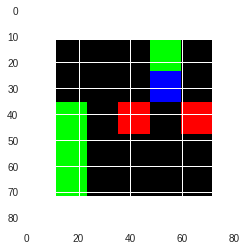

In [33]:
env = gameEnv(size=5)

In [0]:
class Qnetwork():
  def __init__(self, h_size):
    self.scalarInput = tf.placeholder(shape=[None,21168],dtype=tf.float32)
    self.imageIn = tf.reshape(self.scalarInput, shape=[-1,84,84,3])
    
    self.conv1 = tf.contrib.layers.convolution2d(
        inputs=self.imageIn,num_outputs=32,
        kernel_size=[8,8],stride=[4,4],
        padding='VALID',biases_initializer=None
    )
    
    self.conv2 = tf.contrib.layers.convolution2d(
        inputs=self.conv1,num_outputs=64,kernel_size=[4,4],stride=[2,2],
        padding='VALID',biases_initializer=None
    )
    
    self.conv3 = tf.contrib.layers.convolution2d(
        inputs=self.conv2,num_outputs=64,kernel_size=[3,3],stride=[1,1],
        padding='VALID',biases_initializer=None
    )
    
    self.conv4 = tf.contrib.layers.convolution2d(
        inputs=self.conv3,num_outputs=512,kernel_size=[7,7],stride=[1,1],
        padding='VALID',biases_initializer=None
    )
    
    self.streamAC, self.streamVC = tf.split(self.conv4,2,3)
    self.streamA = tf.contrib.layers.flatten(self.streamAC)
    self.streamV = tf.contrib.layers.flatten(self.streamVC)
    self.AW = tf.Variable(tf.random_normal([h_size//2, env.actions]))
    self.VW = tf.Variable(tf.random_normal([h_size//2,1]))
    self.Advantage = tf.matmul(self.streamA, self.AW)
    self.Value = tf.matmul(self.streamV, self.VW)
    
    self.Qout = self.Value+tf.subtract(self.Advantage, tf.reduce_mean(self.Advantage, reduction_indices=1,keep_dims=True))
    
    self.predict = tf.argmax(self.Qout,1)
    
    self.targetQ = tf.placeholder(shape=[None], dtype=tf.float32)
    self.actions = tf.placeholder(shape=[None], dtype=tf.int32)
    self.actions_onehot = tf.one_hot(self.actions, env.actions,dtype=tf.float32)
    
    self.Q = tf.reduce_sum(tf.multiply(self.Qout, self.actions_onehot),reduction_indices=1)
    
    self.td_error = tf.square(self.targetQ-self.Q)
    self.loss = tf.reduce_mean(self.td_error)
    self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
    
    self.updateModel = self.trainer.minimize(self.loss)

In [0]:
class experience_buffer():
  def __init__(self, buffer_size=50000):
    self.buffer = []
    self.buffer_size = buffer_size
    
  def add(self, experience):
    if len(self.buffer)+len(experience)>=self.buffer_size:
      self.buffer[0:(len(experience)+len(self.buffer))-self.buffer_size] = []
      
    self.buffer.extend(experience)
    
  def sample(self, size):
    return np.reshape(np.array(random.sample(self.buffer,size)),[size,5])
  
  

In [0]:
def processState(states):
  return np.reshape(states, [21168])

In [0]:
def updateTargetGraph(tfVars, tau):
  total_vars = len(tfVars)
  op_holder = []
  for idx,var in enumerate(tfVars[0:total_vars//2]):
    op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau)+((1-tau)*tfVars[idx+total_vars//2].value())))
      
  return op_holder
  
def updateTarget(op_holder,sess):
  for op in op_holder:
    sess.run(op)

In [0]:
batch_size = 32
update_freq = 4
y = .99
startE = 1
endE = 0.1
anneling_steps = 10000.
num_episodes = 10000
pre_train_steps = 10000
max_epLength = 50
load_model = False
path = './dqn'
h_size = 512
tau = 0.001

In [0]:
mainQN = Qnetwork(h_size)
targetQN = Qnetwork(h_size)
init = tf.global_variables_initializer()

trainables = tf.trainable_variables()
targetOps = updateTargetGraph(trainables, tau)

myBuffer = experience_buffer()

e = startE

stepDrop = (startE-endE)/anneling_steps

rList = []
total_steps = 0

saver = tf.train.Saver()
if not os.path.exists(path):
  os.makedirs(path)

In [0]:
with tf.Session() as sess:
  if load_model == True:
    print('Loading Model...')
    ckpt = tf.train.get_checkpoint_state(path)
    saver.restore(sess, ckpt.model_checkpoint_path)
    
  sess.run(init)
  updateTarget(targetOps, sess)
  for i in range(num_episodes+1):
    episodeBuffer = experience_buffer()
    s = env.reset()
    s = processState(s)
    d = False
    rAll = 0
    j = 0
    
    while j<max_epLength:
      j+=1
      if np.random.rand(1) < e or total_steps<pre_train_steps:
        a = np.random.randint(0,4)
        
      else:
        a = sess.run(mainQN.predict, feed_dict={mainQN.scalarInput:[s]})[0]
        
      s1,r,d = env.step(a)
      s1 = processState(s1)
      total_steps += 1
      episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5]))
      
      if total_steps > pre_train_steps:
        if e>endE:
          e -= stepDrop
          
        if total_steps % (update_freq)==0:
          trainBatch = myBuffer.sample(batch_size)
          A = sess.run(mainQN.predict, feed_dict={
              mainQN.scalarInput:np.vstack(trainBatch[:,3])
          })
          
          Q = sess.run(targetQN.Qout, feed_dict={
              targetQN.scalarInput:np.vstack(trainBatch[:,3])
          })
          doubleQ = Q[range(batch_size),A]
          targetQ = trainBatch[:,2]+y*doubleQ
          _ = sess.run(mainQN.updateModel, feed_dict={
              mainQN.scalarInput:np.vstack(trainBatch[:,0]),
              mainQN.targetQ:targetQ,
              mainQ.//]
              
              P8IKHNE2N.actions:trainBatch[:,1]
          })
          
          updateTarget(targetOps, sess)
          
      rAll += r
      s = s1
      
      if d==True:
        break
        
    myBuffer.add(episodeBuffer.buffer)
    rList.append(rAll)
    if i>0 and i%25==0:
      print('episode',i,', average reward of last 25 episode',np.mean(rList[-25:]))
      
    if i>0 and i%1000==0:
      saver.save(sess,path+'/model-'+str(i)+'.cptk')
      print('Saved Model')
      
  saver.save(sess,path+'/model-'+str(i)+'.cptk')

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


episode 25 , average reward of last 25 episode 2.08
episode 50 , average reward of last 25 episode 1.52
episode 75 , average reward of last 25 episode 1.8
episode 100 , average reward of last 25 episode 0.76
episode 125 , average reward of last 25 episode 0.96
episode 150 , average reward of last 25 episode 1.08
episode 175 , average reward of last 25 episode 0.92
episode 200 , average reward of last 25 episode 0.6
episode 225 , average reward of last 25 episode 0.52
episode 250 , average reward of last 25 episode 0.36
episode 275 , average reward of last 25 episode 0.48
episode 300 , average reward of last 25 episode 0.56
episode 325 , average reward of last 25 episode 0.48
episode 350 , average reward of last 25 episode 0.32
episode 375 , average reward of last 25 episode 0.0
episode 400 , average reward of last 25 episode 0.12
episode 425 , average reward of last 25 episode 0.44
episode 450 , average reward of last 25 episode 0.68
episode 475 , average reward of last 25 episode 0.64

episode 1525 , average reward of last 25 episode 0.52
episode 1550 , average reward of last 25 episode 0.56
episode 1575 , average reward of last 25 episode 0.36
episode 1600 , average reward of last 25 episode 0.64
episode 1625 , average reward of last 25 episode 0.48
episode 1650 , average reward of last 25 episode 0.44
episode 1675 , average reward of last 25 episode 0.72
episode 1700 , average reward of last 25 episode 0.04
episode 1725 , average reward of last 25 episode 0.0
episode 1750 , average reward of last 25 episode 0.56
episode 1775 , average reward of last 25 episode 0.88
episode 1800 , average reward of last 25 episode 0.24
episode 1825 , average reward of last 25 episode 0.08
episode 1850 , average reward of last 25 episode 0.36
episode 1875 , average reward of last 25 episode 0.44
episode 1900 , average reward of last 25 episode 0.32
episode 1925 , average reward of last 25 episode 0.4
episode 1950 , average reward of last 25 episode 0.36
episode 1975 , average reward 

In [0]:
rMat = np.resize(np.array(rList),[len(rList)//100,100])
rMean = np.average(rMat,1)
plt.plot(rMean)